## Building a Restricted Boltzmann Machine

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

## 1. Load and prepare the data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## 2. Define the structure of the network

In [3]:
visible_nodes = 784
hidden_nodes = 100
learning_rate = 0.01

## 3. Create the weights and biases

Joint configuration: 

$$ E(v, h) = -av - bh - v^tWh $$

In [4]:
# Weights
init_weights = tf.random_normal((visible_nodes, hidden_nodes), 
                                       mean=0., 
                                       stddev=1./visible_nodes)
weights = tf.Variable(init_weights)

# Biases: a and b
visible_bias = tf.Variable(tf.zeros([visible_nodes])) # a
hidden_bias = tf.Variable(tf.zeros([hidden_nodes])) # b

## 4. Create the visible, hidden nodes and reconstructions

In [5]:
visible = tf.placeholder(tf.float32, shape=[None, visible_nodes])
hidden = tf.nn.sigmoid(tf.matmul(visible, weights) + hidden_bias)
# reconstructions
visible_reconstruction = tf.nn.sigmoid(tf.matmul(hidden, tf.transpose(weights)) + visible_bias)
final_hidden = tf.nn.sigmoid(tf.matmul(visible_reconstruction, weights) + hidden_bias)

## 5. Calculate the expectations

In [6]:
expectations_data = tf.matmul(tf.transpose(visible), hidden)
expectations_model = tf.matmul(tf.transpose(visible_reconstruction), final_hidden)
diff = expectations_data - expectations_model

## 6. Update the weights and biases

In [7]:
weight_update = weights.assign_add(learning_rate * diff)

visible_bias_update = visible_bias.assign_add(learning_rate * tf.reduce_mean(visible - visible_reconstruction, 0))

hidden_bias_update = hidden_bias.assign_add(learning_rate * tf.reduce_mean(hidden - final_hidden, 0))

train_op = tf.group(weight_update, visible_bias_update, hidden_bias_update)

## This is just for informative purposes
loss = tf.reduce_sum(tf.square(visible - visible_reconstruction))

## 7. Run the computational graph

In [8]:
n_epochs = 30
batch_size = 64
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
print("Epoch: ")
for epoch in range(n_epochs):
    for iteration in range(mnist.train.num_examples // batch_size):
        x_batch, y_batch = mnist.train.next_batch(batch_size)
        _ = sess.run([train_op, loss], feed_dict={visible: x_batch})
    print(epoch+1, end=',')

Epoch: 
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,

## Reconstructing some images

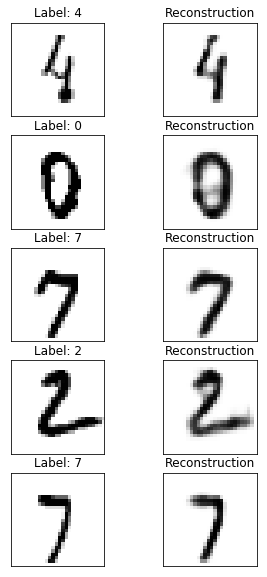

In [9]:
n_images = 5
reconstructed_imgs = []
fig, ax = plt.subplots(nrows=n_images, ncols=2, figsize=(5,10))
for i in range(n_images):
    image = mnist.train.images[i]
    reconstruction = sess.run(visible_reconstruction, 
                              feed_dict={visible:[image]})
    reconstruction = reconstruction.reshape(28,28)
    image = image.reshape(28,28)
    reconstructed_imgs.append((image, reconstruction))
    # plotting images
    ax[i,0].imshow(-1*reconstructed_imgs[i][0], cmap='gray')
    ax[i,0].set_title("Label: " + str(mnist.train.labels[i]))
    ax[i,0].set_xticks([]); ax[i,0].set_yticks([])
    ax[i,1].imshow(-1*reconstructed_imgs[i][1], cmap='gray')
    ax[i,1].set_title("Reconstruction")
    ax[i,1].set_xticks([]); ax[i,1].set_yticks([])

Implementation based on:

[A Practical Guide to Training Restricted Boltzmann Machines](http://www.cs.toronto.edu/~hinton/absps/guideTR.pdf)